## Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In [ ]:
# importing libraries

import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.shape

(660, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## Exploratory Data Analysis

In [ ]:
data['Total_Credit_Cards'].value_counts()

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='count'>

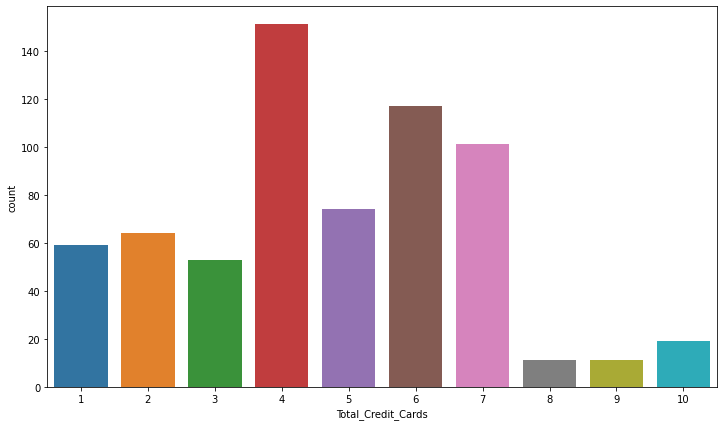

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Total_Credit_Cards'], data = data)

The above graph shows that the maximum customers have 4 credit cards.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_visits_bank', ylabel='count'>

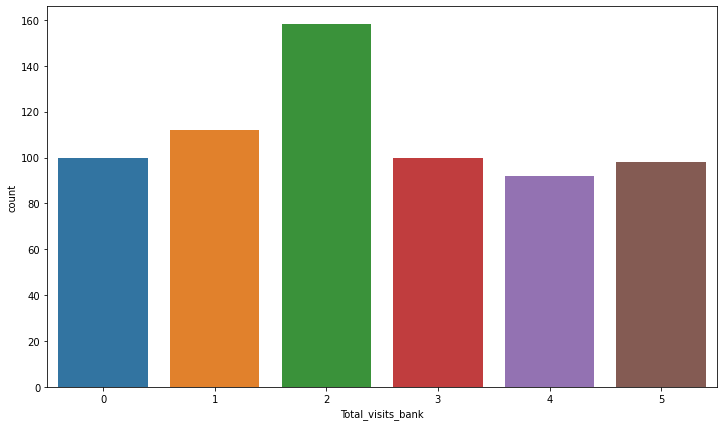

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Total_visits_bank'], data = data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_visits_online', ylabel='count'>

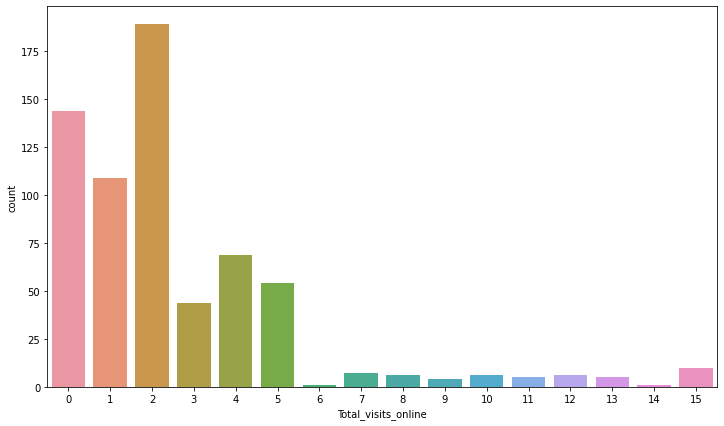

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Total_visits_online'], data = data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_calls_made', ylabel='count'>

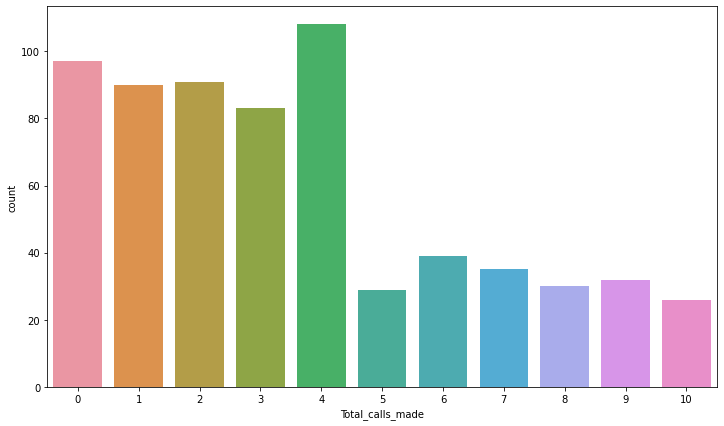

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Total_calls_made'], data = data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


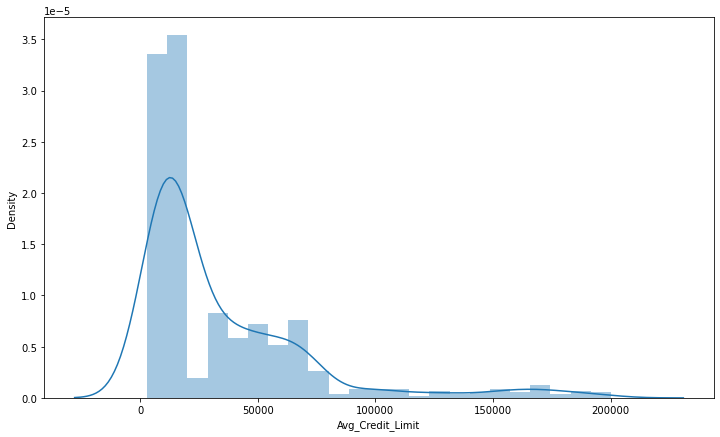

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(data.Avg_Credit_Limit);

The majority of records do not have credit or have a low limit.

### Bivariate Analysis

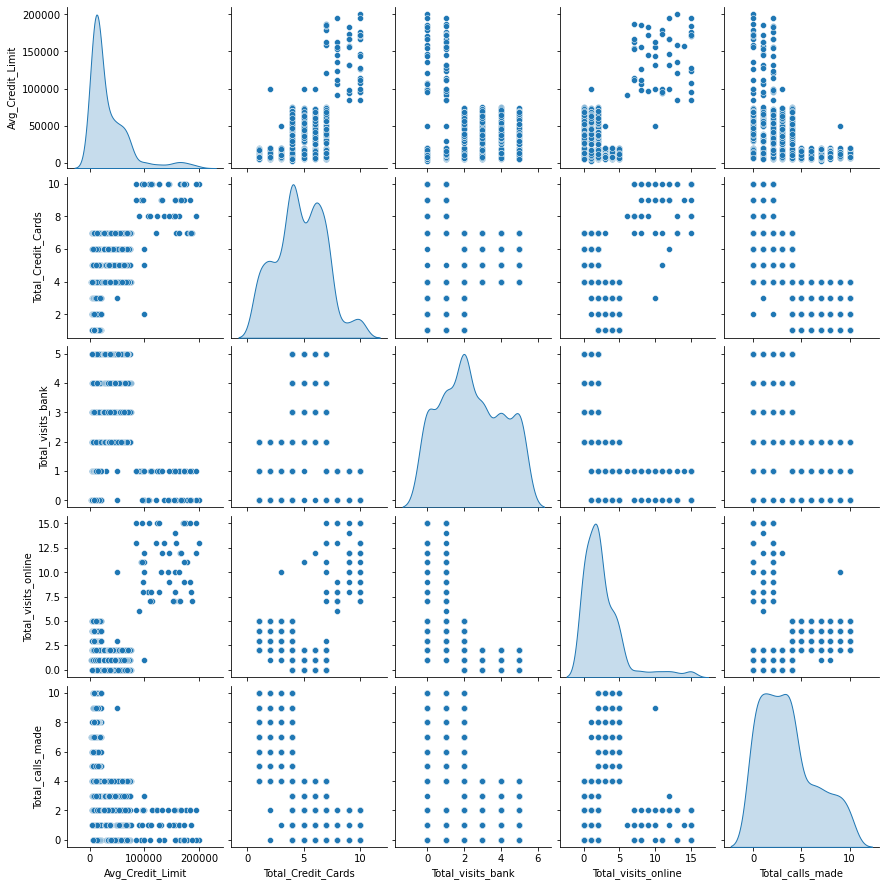

In [ ]:
sns.pairplot(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');

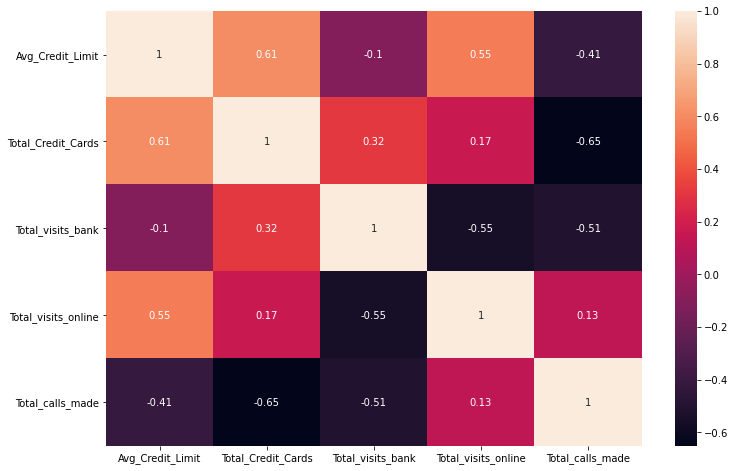

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

-- We observe good positive relations between AVG_credit_limit and total card own.

## Data Preprocessing

#### Checking for Null Values

In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There is no null values in the dataset.

#### Checking for outliers

In [ ]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Avg_Credit_Limit'>

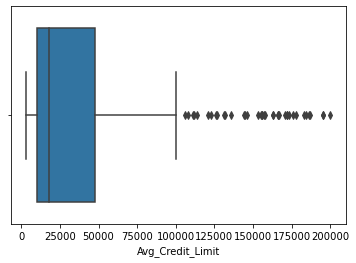

In [ ]:
sns.boxplot(data.Avg_Credit_Limit, data = data, orient = 'v')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Total_visits_online'>

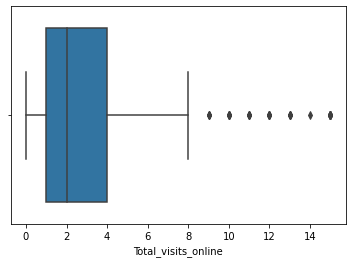

In [ ]:
sns.boxplot(data.Total_visits_online, data = data, orient = 'v')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

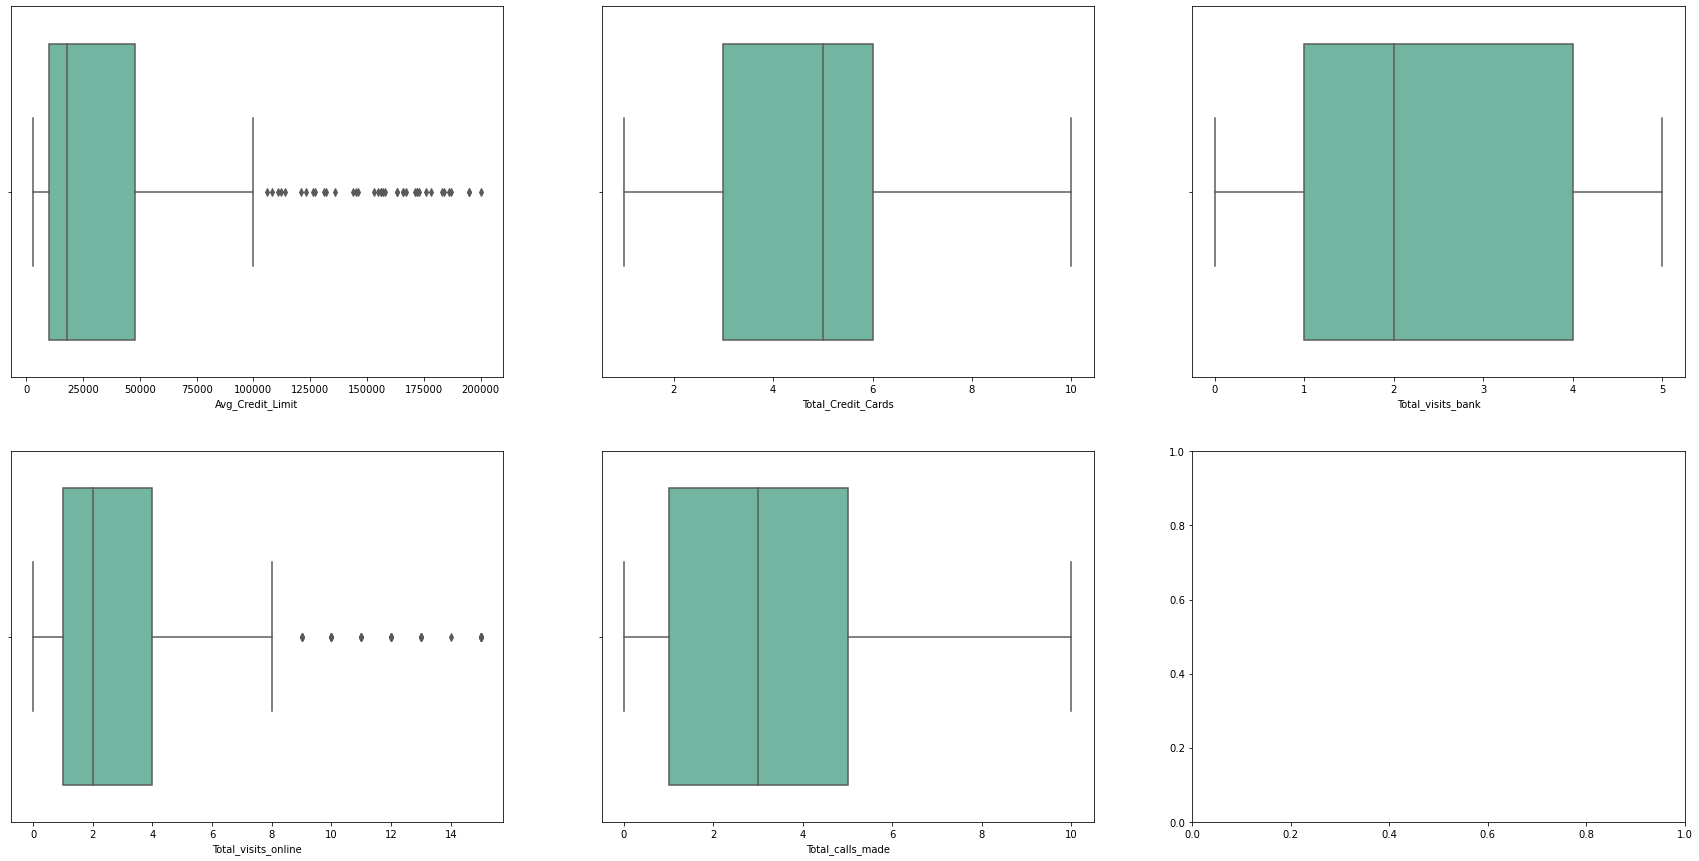

In [ ]:


fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data['Avg_Credit_Limit'], data=data, palette='Set2', ax=ax[0][0], orient = 'v')
sns.boxplot(data['Total_Credit_Cards'], data=data, palette='Set2', ax=ax[0][1], orient = 'v')
sns.boxplot(data['Total_visits_bank'], data=data, palette='Set2', ax=ax[0][2], orient = 'v')
sns.boxplot(data['Total_visits_online'], data=data, palette='Set2', ax=ax[1][0], orient = 'v')
sns.boxplot(data['Total_calls_made'], data=data, palette='Set2', ax=ax[1][1], orient = 'v')

plt.show()

From the above plots we can clearly see that features such as 'Avg_Credit_Limit' and 'Total_visits_Online' contains the positive outliers.

#### Checking for Duplicate observations

In [ ]:
data['Customer Key'].nunique()

655

There are 5 duplicate entries for Customer Key

In [ ]:
duplicates = data.duplicated(subset=['Customer Key']).any()

In [ ]:
duplicates

True

In [ ]:
duplicateRows = data[data.duplicated(subset=['Customer Key'])]

In [ ]:
duplicateRows

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [ ]:
# Remove the duplicate rows

data.drop_duplicates(subset=['Customer Key'], inplace=True)

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.shape

(655, 7)

## Apply K-Means Clustering Algorithms

In [ ]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_data = scaler.fit_transform(data)

In [ ]:
std_data

array([[-1.72285692,  1.25119503,  1.76707628, ..., -0.85856807,
        -0.54664171, -1.25700595],
       [-1.71761151, -0.65048234,  0.42344023, ..., -1.47116294,
         2.51652641,  1.88417679],
       [-1.7123661 , -1.47405141,  0.42344023, ..., -0.85856807,
         0.13406232,  0.13907527],
       ...,
       [ 1.72337746, -0.04784223,  2.97634873, ..., -0.85856807,
         2.1761744 , -0.90798565],
       [ 1.72862287,  1.00036856,  3.70191219, ..., -0.85856807,
         4.21828648, -1.25700595],
       [ 1.73386828,  0.98063229,  3.56754859, ..., -1.47116294,
         3.19723044, -0.55896534]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering



import warnings
warnings.filterwarnings("ignore")

### Determining Number of Clusters with Elbow Method

In [ ]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

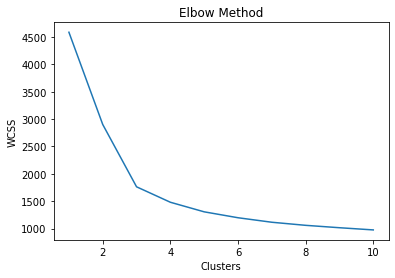

In [ ]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Now we can see that elbow is bend at cluster no. 3, so we can say that for this particular dataset we can choose 3 clusters.

### Determining Number of Clusters with Silhouette Scores Method

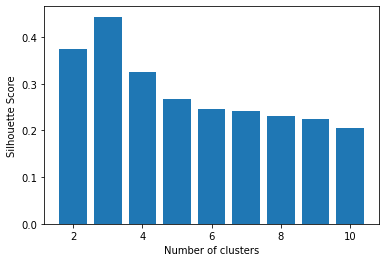

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(std_data, KMeans(n_clusters = n_cluster).fit_predict(std_data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(std_data)
    sil_score = metrics.silhouette_score(std_data,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(std_data, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.375
Silhouette score for 3 cluster k-means: 0.444
Silhouette score for 4 cluster k-means: 0.325
Silhouette score for 5 cluster k-means: 0.267
Silhouette score for 6 cluster k-means: 0.246
Silhouette score for 7 cluster k-means: 0.243
Silhouette score for 8 cluster k-means: 0.231
Silhouette score for 9 cluster k-means: 0.212
Silhouette score for 10 cluster k-means: 0.221
Silhouette score for 11 cluster k-means: 0.208
Silhouette score for 12 cluster k-means: 0.208
Silhouette score for 13 cluster k-means: 0.188
Silhouette score for 14 cluster k-means: 0.173
Silhouette score for 15 cluster k-means: 0.186
Silhouette score for 16 cluster k-means: 0.181
Silhouette score for 17 cluster k-means: 0.178
Silhouette score for 18 cluster k-means: 0.171
Silhouette score for 19 cluster k-means: 0.172


Again with plot, we can clearly observe that silhouette score is high when we have 3 clusters.

In [ ]:
kmeans3 = std_data.copy() 

In [ ]:
kmeans3_  = KMeans(n_clusters=8, random_state=40).fit(kmeans3)

## Hierarchical Clustering

In [ ]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(std_data)
        sil_score = metrics.silhouette_score(std_data, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['clusters', 'sil_score','linkage_method', 'number_of_clusters'])

In [ ]:
df_hierarchical.sort_values('sil_score', ascending=False)

,clusters,sil_score,linkage_method,number_of_clusters
2,2,0.498458,complete,2
1,2,0.498458,average,2
5,4,0.433359,complete,4
0,2,0.373409,ward,2
7,6,0.371860,average,6
8,6,0.330639,complete,6
3,4,0.316971,ward,4
10,8,0.290477,average,8
4,4,0.260055,average,4
6,6,0.226299,ward,6


In [ ]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=2).fit_predict(std_data)

In [ ]:
data['cluster'] = hierarchical_ 

In [ ]:
data['cluster'].value_counts()

0    608
1     47
Name: cluster, dtype: int64

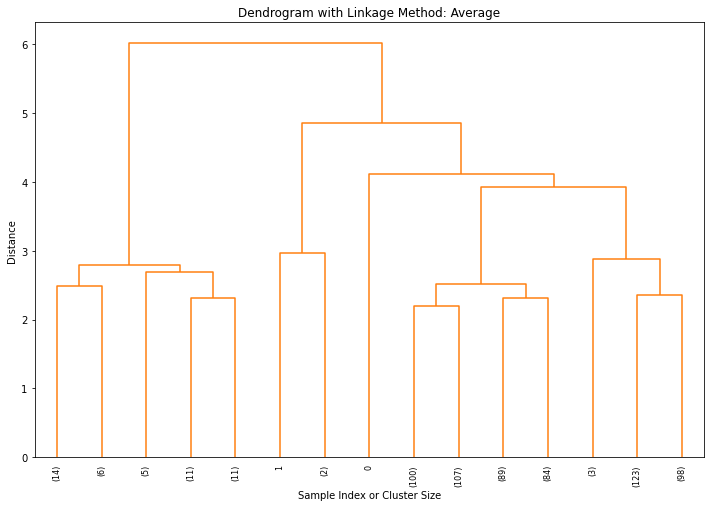

In [ ]:
plt.figure(figsize=(12,8)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(std_data, method='average'), p = 15, truncate_mode = "lastp", leaf_rotation = 90, color_threshold = 40, leaf_font_size = 8) 
plt.show() 

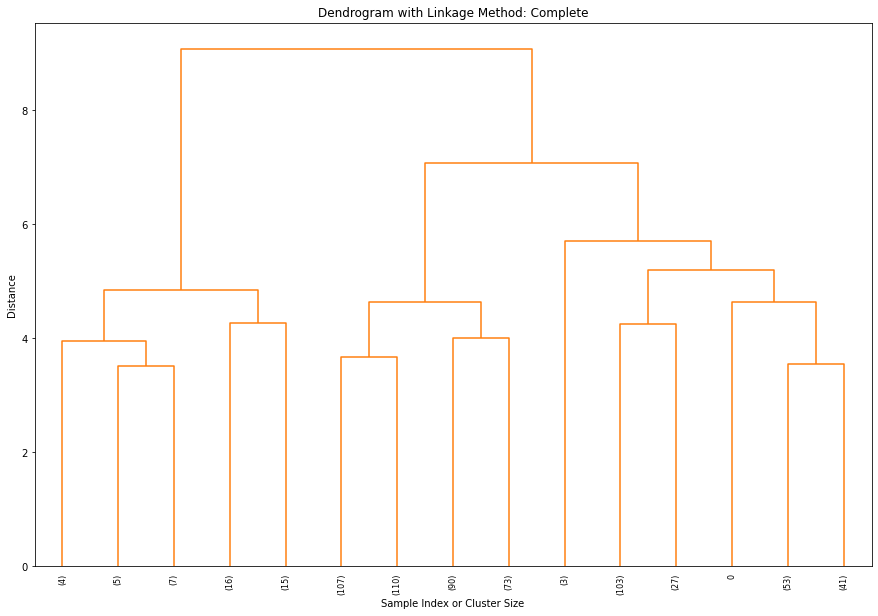

In [ ]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Complete") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(std_data, method='complete'), p = 15, truncate_mode = "lastp", leaf_rotation = 90, color_threshold = 40, leaf_font_size = 8) 
plt.show()

## Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights

In [ ]:
kmeans_      = KMeans(n_clusters=3, random_state=40).fit_predict(std_data)

In [ ]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=2).fit_predict(std_data)

In [ ]:
kmeansSilhouette_Score        = metrics.silhouette_score(std_data, kmeans_, metric='euclidean')

Hierarchical_Silhouette_Score = metrics.silhouette_score(std_data, hierarchical_, metric='euclidean')

In [ ]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.498458
0,KMeans,0.443557


***The Hierarchical method seems more suitable with a high silhouette score, after checking clusters and the number of variables in each cluster***

# DBSCAN Clustering

In [ ]:
from sklearn.neighbors import NearestNeighbors

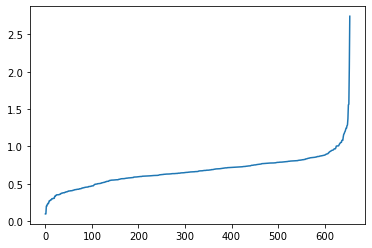

In [ ]:
neigh = NearestNeighbors(n_neighbors= 2)
nb = neigh.fit(std_data)
dist, indices = nb.kneighbors(std_data)
dist = np.sort(dist, axis = 0)
dist = dist[:,1]
plt.plot(dist)

In [ ]:
 siliuette_list_dbscan = []

for minpts in range(1,20):
        db = DBSCAN(eps=1,min_samples=minpts, metric='euclidean').fit(std_data)
        label = db.labels_
        sil_score = metrics.silhouette_score(std_data, label, metric='euclidean')
        siliuette_list_dbscan.append((sil_score, minpts, len(set(dbscan)) ) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['sil_score', 'minpts', 'number_of_clusters'])

In [ ]:
df_dbscan.sort_values("sil_score", ascending = False)

,sil_score,minpts,number_of_clusters
6,0.374190,7,1
3,0.352207,4,1
5,0.350375,6,1
7,0.343498,8,1
4,0.335633,5,1
2,0.332241,3,1
8,0.314534,9,1
9,0.288588,10,1
10,0.248085,11,1
11,0.000717,12,1


In [ ]:
db_= DBSCAN(eps=1,min_samples=7, metric='euclidean').fit_predict(std_data)

In [ ]:
db_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0

In [ ]:
db_Silhouette_Score = metrics.silhouette_score(std_data, db_, metric='euclidean')

In [ ]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Hierarchical',Hierarchical_Silhouette_Score ], ['DBSCAN', db_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.498458
0,KMeans,0.443557
2,DBSCAN,0.374190


# **Actionable insights and Recommendations**

### **There appears to be three distinct categories of customers:**

1. *In-person users: prefer to handle bank transactions in person. They have the medium number of credit cards and the medium available credit. They are also the most active users.*
2. *Phone users: prefer verbally handling transactions. They have fewest credit cards and lowest credit card limit.*
3. *Online users: prefer digital transactions. They also have the most credit cards and the highest available credit. Least number of customers have this type of behaviour.*

***The customer preferences should be used to contact the customers. Online/phone users will probably prefer email/text notifications, while in-person users prefer mail notifications and upselling (when at the bank location).***

***Also, the phone and in-person customers should be reached out to promote online banking.***